In [1]:
import pandas as pd
import numpy as np
olympics = pd.read_csv('athlete_events.csv')
olympics.head()
olympics['Medal'].fillna('DNW', inplace = True)
noc_country = pd.read_csv('noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()
Merge_olympics = olympics.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')
world_gdp = pd.read_csv('world_gdp.csv', skiprows = 3)

# Remove unnecessary columns
world_gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

# The columns are the years for which the GDP has been recorded. This needs to brought into a single column for efficient
# merging.
world_gdp = pd.melt(world_gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

# convert the year column to numeric
world_gdp['Year'] = pd.to_numeric(world_gdp['Year'])

world_gdp.head()

merge_olympics_countrycode = Merge_olympics.merge(world_gdp[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country Name',
                                            how = 'left')

merge_olympics_countrycode.drop('Country Name', axis = 1, inplace = True)

# Merge to get gdp too
olympics_merge_gdp = merge_olympics_countrycode.merge(world_gdp,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace = True)


world_population = pd.read_csv('world_pop.csv')

world_population.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

world_population = pd.melt(world_population, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

# Change the Year to integer type
world_population['Year'] = pd.to_numeric(world_population['Year'])

world_population.head()


olympics_new = olympics_merge_gdp.merge(world_population,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_new.drop('Country_y', axis = 1, inplace = True)

olympics_new.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country_x,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560550e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585680e+11,1.476009e+07
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NLD,2.585680e+11,1.476009e+07
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,3.583300e+11,1.518417e+07
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NLD,3.583300e+11,1.518417e+07
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,3.742910e+11,1.538284e+07
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NLD,3.742910e+11,1.538284e+07


Populating the interactive namespace from numpy and matplotlib


Text(4769654000000.016, 143.0, 'Correlation = 0.5765800001316688')

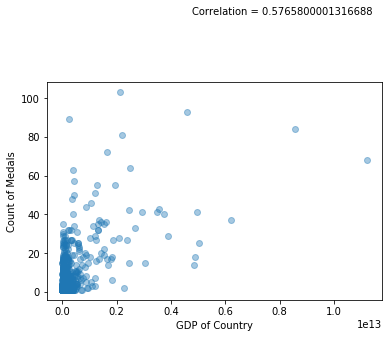

In [2]:
%pylab inline
olympics_merge = olympics_new.loc[(olympics_new['Year'] > 1960) & (olympics_new['Season'] == "Summer"), :]

# Reset row indices
olympics_merge = olympics_merge.reset_index()



olympics1 = pd.read_csv('athlete_events.csv',encoding="ISO-8859–1")
olympics = pd.read_csv('olym.csv',encoding="ISO-8859–1")
mergedframe = pd.merge(olympics1, olympics, left_on='City', right_on='Host City', how ='inner')

import numpy as np
mergedframe['Medal'].fillna('DNW', inplace = True)
mergedframe['Medal_Won'] = np.where(mergedframe.loc[:,'Medal'] == 'DNW', 0, 1)
team_events = pd.pivot_table(mergedframe,
                                      index = ['Team', 'Year_x', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()



team_events = team_events.loc[team_events['Gold'] > 1, :]
team_sports = team_events['Event'].unique()



remove = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]
team_sports = list(set(team_sports) - set(remove))



team_var = mergedframe['Event'].map(lambda x: x in team_sports)
singleEvent = [not i for i in team_var]



# rows where medal_won is 1
medal_mask = mergedframe['Medal_Won'] == 1





mergedframe['Team_Event'] = np.where(team_var & medal_mask, 1, 0)




# Put 1 under singles event if medal is won and event not in team event list
mergedframe['Single_Event'] = np.where(singleEvent & medal_mask, 1, 0)




# Add an identifier for team/single event
mergedframe['Event_Category'] = mergedframe['Single_Event'] + mergedframe['Team_Event']
temp_medaltally = mergedframe.groupby(['Year_x', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].agg('sum').reset_index()
temp_medaltally['Medal_Won_Corrected'] = temp_medaltally['Medal_Won']/temp_medaltally['Event_Category']

# print(medal_tally_agnostic)
medalTotal = temp_medaltally.groupby(['Year_x','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

year_team_gdp = olympics_merge.loc[:, ['Year', 'Team', 'GDP']].drop_duplicates()

medalTotal_gdp = medalTotal.merge(year_team_gdp,
                                   left_on = ['Year_x', 'Team'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')
top_countries = ['United States']
row5 = medalTotal_gdp['Medal_Won_Corrected'] > 0
#row6 = medalTotal_gdp['Team'].map(lambda x: x in top_countries)

correlation = medalTotal_gdp.loc[row5, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]

plot(medalTotal_gdp.loc[row5, 'GDP'], 
     medalTotal_gdp.loc[row5, 'Medal_Won_Corrected'] , 
     linestyle = 'none', 
     marker = 'o',
    alpha = 0.4)
xlabel('GDP of Country')

ylabel('Count of Medals')
text(np.nanpercentile(medalTotal_gdp['GDP'], 99.6), 
     max(medalTotal_gdp['Medal_Won_Corrected']) - 50,
     "Correlation = " + str(correlation))

In [3]:
import pandas as pd
olympics = pd.read_csv('olym.csv',encoding="ISO-8859–1")
olympics1 = pd.read_csv('athlete_events.csv',encoding="ISO-8859–1")
mergedframe = pd.merge(olympics1, olympics, left_on='City', right_on='Host City', how ='inner')
mergedframe.loc[:, ['Year_x', 'Host Country']].drop_duplicates().sort_values('Year_x')
import numpy as np
mergedframe['Medal'].fillna('DNW', inplace = True)
mergedframe['Medal_Won'] = np.where(mergedframe.loc[:,'Medal'] == 'DNW', 0, 1)
identify_team_events = pd.pivot_table(mergedframe,
                                      index = ['Team', 'Year_x', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()



identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]
team_sports = identify_team_events['Event'].unique()



remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]
team_sports = list(set(team_sports) - set(remove_sports))



team_event_mask = mergedframe['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]



# rows where medal_won is 1
medal_mask = mergedframe['Medal_Won'] == 1



# Put 1 under team event if medal is won and event in team event list
mergedframe['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)




# Put 1 under singles event if medal is won and event not in team event list
mergedframe['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)




# Add an identifier for team/single event
mergedframe['Event_Category'] = mergedframe['Single_Event'] + mergedframe['Team_Event']
medal_tally_agnostic = mergedframe.groupby(['Year_x', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].agg('sum').reset_index()
medal_tally_agnostic['Medal_Won_Corrected'] = medal_tally_agnostic['Medal_Won']/medal_tally_agnostic['Event_Category']
top_countries = ['United States', 'Russia', 'Germany']
row_mask_2 = medal_tally_agnostic['Team'].map(lambda x: x in top_countries)



best_team_sports = pd.pivot_table(medal_tally_agnostic[row_mask_2],
                                  index = ['Team', 'Event'],
                                  columns = 'Medal',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum',
                                  fill_value = 0).sort_values(['Team', 'Gold'], ascending = [True, False]).reset_index()

best_team_sports.drop(['Bronze', 'Silver', 'DNW'], axis = 1, inplace = True)
best_team_sports.columns = ['Team', 'Event', 'Gold_Medal_Count']
pd.set_option('display.max_columns', None) 
pd.options.display.max_rows = 999
best_team_sports.groupby('Team').head(10)

/Users/rj/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Team,Event,Gold_Medal_Count
0,Germany,Luge Men's Singles,6
1,Germany,"Equestrianism Mixed Dressage, Team",5
2,Germany,Luge Women's Singles,5
3,Germany,Alpine Skiing Women's Combined,4
4,Germany,"Canoeing Men's Canadian Doubles, 1,000 metres",4
5,Germany,"Canoeing Men's Canadian Singles, 1,000 metres",4
6,Germany,"Canoeing Men's Kayak Doubles, 1,000 metres",4
7,Germany,"Canoeing Women's Kayak Doubles, 500 metres",4
8,Germany,"Equestrianism Mixed Jumping, Team",4
9,Germany,Rowing Men's Quadruple Sculls,4


In [4]:
mergedframe

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year_x,Season,City,Sport,Event,Medal,Host City,Country,Summer (Olympiad),Winter,Year_y,latitude,longitude,Medal_Won,Team_Event,Single_Event,Event_Category
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,0,0,0,0
1,33,Mika Lauri Aarnikka,M,24.0,187.0,76.0,Finland,FIN,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Men's Two Person Dinghy,DNW,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,0,0,0,0
2,43,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,Norway,NOR,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Jumping, Individual",DNW,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,0,0,0,0
3,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,EST,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",DNW,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,0,0,0,0
4,64,M'Bairo Abakar,M,31.0,NaN,NaN,Chad,CHA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,DNW,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,0,0,0,0
5,71,Juan Antonio Aball Delgado,M,27.0,172.0,82.0,Cuba,CUB,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Canadian Doubles, 500 metres",DNW,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,0,0,0,0
6,71,Juan Antonio Aball Delgado,M,27.0,172.0,82.0,Cuba,CUB,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Canadian Doubles, 1,000 metres",DNW,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,0,0,0,0
7,83,Carlos Arturo Abarza Chavez,M,22.0,NaN,NaN,Chile,CHI,1992 Summer,1992,Summer,Barcelona,Shooting,Shooting Mixed Skeet,DNW,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,0,0,0,0
8,99,Pter Abay,M,30.0,181.0,79.0,Hungary,HUN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Sabre, Team",Silver,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,1,1,0,1
9,107,Carmine Abbagnale,M,30.0,182.0,90.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver,Barcelona,Spain,XXV,NaN,NaN,41.388787,2.158985,1,1,0,1


In [5]:
medal_tally_agnostic['Medal_Won_Corrected'] = medal_tally_agnostic['Medal_Won']/medal_tally_agnostic['Event_Category']
# print(medal_tally_agnostic)
medal_tally = medal_tally_agnostic.groupby(['Year_x','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()
# x=mergedframe.drop(['ID','Sex','Age','Height','Weight','Year_y','Games','Event'],axis=1)
# pd.set_option('display.max_columns', None) 
# pd.options.display.max_rows = 999
# x.head(100)
y=mergedframe.drop(['ID','Sex','Age','Height','Weight','Year_y','Event'],axis=1)
y.rename(columns = {'Year_x':'Year'}, inplace = True)
medal_tally.head()
# y.head(200)
# z=y.groupby(['Season','Team'])['Name'].count()
# pd.set_option('display.max_columns', None) 
# pd.options.display.max_rows = 999
# z.head(200)
year_host_team = y[['Year', 'Country', 'Team','Season']].drop_duplicates()
#print(year_host_team)

# check rows where host country is the same as team
#print(year_host_team)
row_mask_4 = (year_host_team['Country'].str.strip() == year_host_team['Team'].str.strip())

# add years in the year_host_team to capture one previous and one later year
year_host_team['Prev_Year'] = year_host_team['Year'] - 4
year_host_team['Next_Year'] = year_host_team['Year'] + 4

# Subset only where host nation and team were the same
year_host_team = year_host_team[row_mask_4]

#print("asdf")
#year_host_team.columns
#medal_tally.columns

# Calculate the medals won in each year where a team played at home. merge year_host_team with medal_tally on year and team
year_host_team_medal = year_host_team.merge(medal_tally,
                                           left_on = ['Year', 'Team'],
                                           right_on = ['Year_x', 'Team'],
                                           how = 'left')
#print(medal_tally)
#print("asdf")
#print(year_host_team)

#print(year_host_team_medal)
year_host_team_medal.rename(columns = {'Medal_Won_Corrected' : 'Medal_Won_Host_Year'}, inplace = True)

# Calculate medals won by team in previous year
year_host_team_medal = year_host_team_medal.merge(medal_tally,
                                                 left_on = ['Prev_Year', 'Team'],
                                                 right_on = ['Year_x', 'Team'],
                                                 how = 'left')
#print(year_host_team_medal)
year_host_team_medal.drop('Year_x_y', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Medal_Won_Corrected': 'Medal_Won_Prev_Year',
                                    'Year':'Year'}, inplace = True)

# # Calculate the medals won by the team the year after they hosted.
year_host_team_medal = year_host_team_medal.merge(medal_tally,
                                                 left_on = ['Next_Year', 'Team'],
                                                 right_on = ['Year_x', 'Team'],
                                                 how = 'left')
#print(year_host_team_medal)
year_host_team_medal.drop('Year_x', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Year': 'Year',
                                       'Medal_Won_Corrected' : 'Medal_Won_Next_Year'}, inplace = True)

# # General formatting changes
year_host_team_medal.drop(['Prev_Year', 'Next_Year'], axis = 1, inplace = True)
year_host_team_medal.sort_values('Year', ascending = True, inplace = True)
year_host_team_medal.reset_index(inplace = True, drop = True)


# # column re-ordering
year_host_team_medal = year_host_team_medal.loc[:, ['Year', 'Country', 'Team', 'Season','Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]

year_host_team_medal.fillna("No Participation")

,Year,Country,Team,Season,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year
0,1900,France,France,Summer,No Participation,66.0,1
1,1904,United States,United States,Summer,45,193.0,46
2,1912,Sweden,Sweden,Summer,24,57.0,No Participation
3,1924,France,France,Summer,No Participation,39.0,24
4,1924,France,France,Winter,No Participation,39.0,24
5,1928,Netherlands,Netherlands,Summer,10,22.0,8
6,1932,United States,United States,Summer,56,114.0,59
7,1932,United States,United States,Winter,56,114.0,59
8,1952,Norway,Norway,Winter,6,18.0,7
9,1952,Finland,Finland,Summer,22,30.0,22


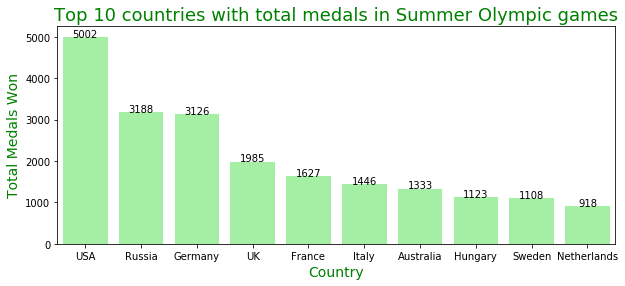

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
olympics2= pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')
noc['region'].fillna(noc['notes'], inplace=True)
olympics2['Medal'] = olympics2['Medal'].fillna('No Medal')
player = olympics2.merge(noc, how='left', on='NOC')
#print(athlete)
top10_summer = player[(olympics2['Season']=='Summer') & (player['Medal']!='No Medal')].groupby('region').count().reset_index()[['region','Medal']].sort_values('Medal', ascending=False).head(10)
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="region", y="Medal", data=top10_summer, label="region", color="palegreen")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,p.get_height(),
            
            '{:1.0f}'.format(p.get_height()),
            ha="center")

ax.set_xlabel('Country', size=14, color="green")
ax.set_ylabel('Total Medals Won', size=14, color="green")
ax.set_title('Top 10 countries with total medals in Summer Olympic games', size=18, color="green")
plt.show()

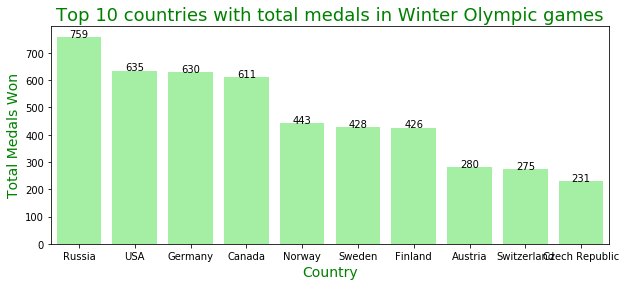

In [7]:
top10_winter = player[(olympics2['Season']=='Winter') & (player['Medal']!='No Medal')].groupby('region').count().reset_index()[['region','Medal']].sort_values('Medal', ascending=False).head(10)
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="region", y="Medal", data=top10_winter, label="region", color="palegreen")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,p.get_height(),
            
            '{:1.0f}'.format(p.get_height()),
            ha="center")

ax.set_xlabel('Country', size=14, color="green")
ax.set_ylabel('Total Medals Won', size=14, color="green")
ax.set_title('Top 10 countries with total medals in Winter Olympic games', size=18, color="green")
plt.show()

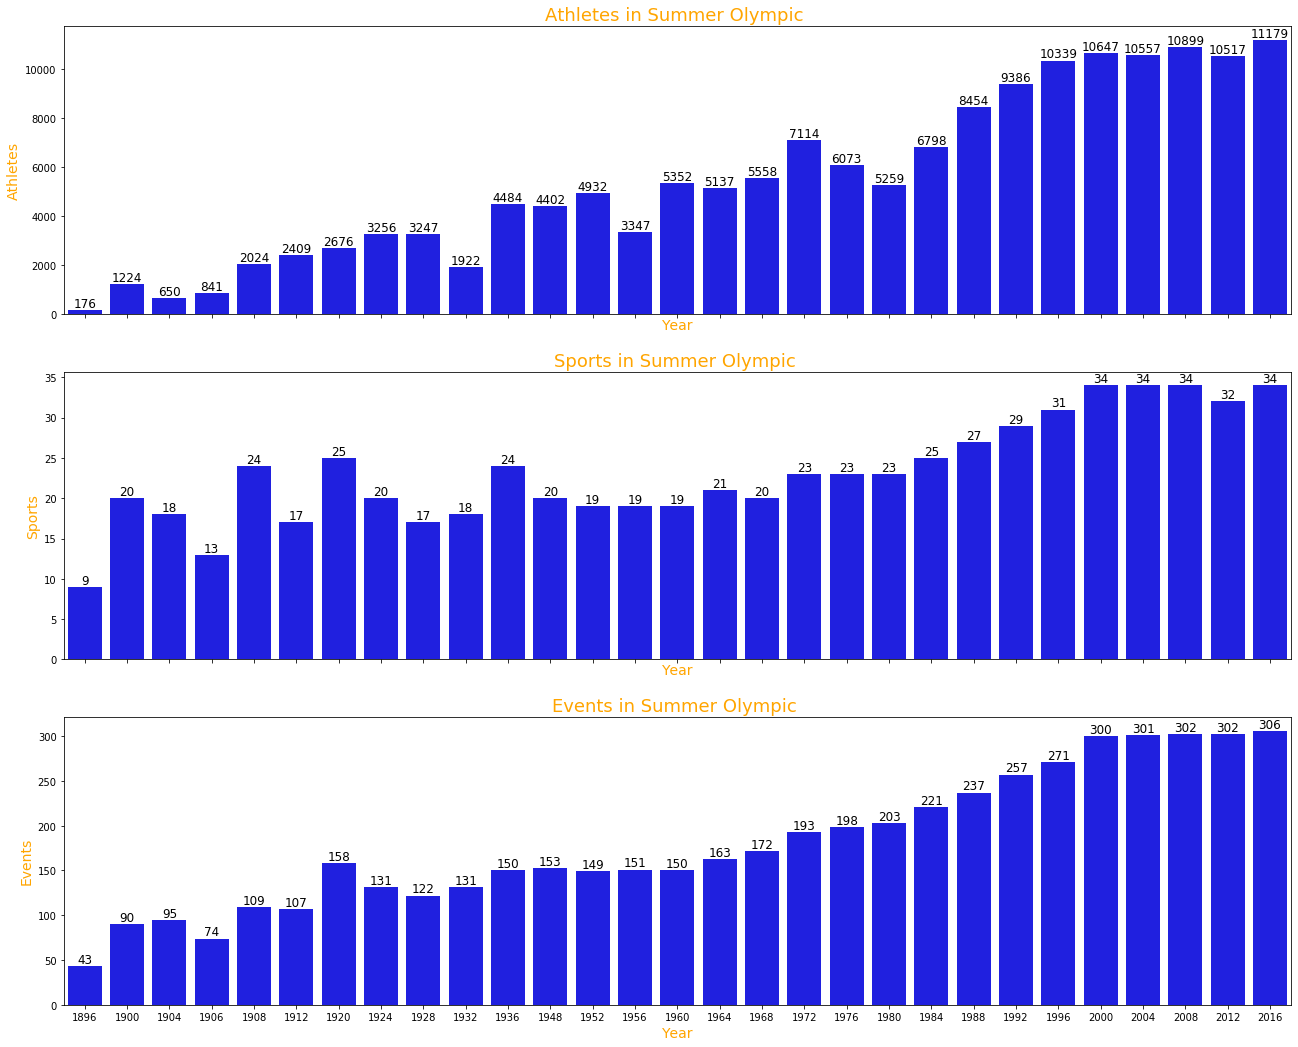

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


summerData = olympics2[olympics2['Season']=='Summer']

summerAthletes = summerData.pivot_table(summerData, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','ID']]
summerSports = summerData.groupby('Year')['Sport'].nunique().reset_index()
summerEvents = summerData.groupby('Year')['Event'].nunique().reset_index()

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(22,18))

sns.barplot(x='Year', y='ID', data=summerAthletes, ax=ax[0], color="blue")
sns.barplot(x='Year', y='Sport', data=summerSports, ax=ax[1], color="blue")
sns.barplot(x='Year', y='Event', data=summerEvents, ax=ax[2], color="blue")

j = 0
for i in ['Athletes', 'Sports', 'Events']:
    ax[j].set_xlabel('Year', size=14, color="orange")
    ax[j].set_ylabel(i, size=14, color="orange")
    ax[j].set_title(i + ' in Summer Olympic ', size=18, color="orange")
    j = j + 1
    
for i in range(3):
    for p in ax[i].patches:
        ax[i].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom')
plt.show()

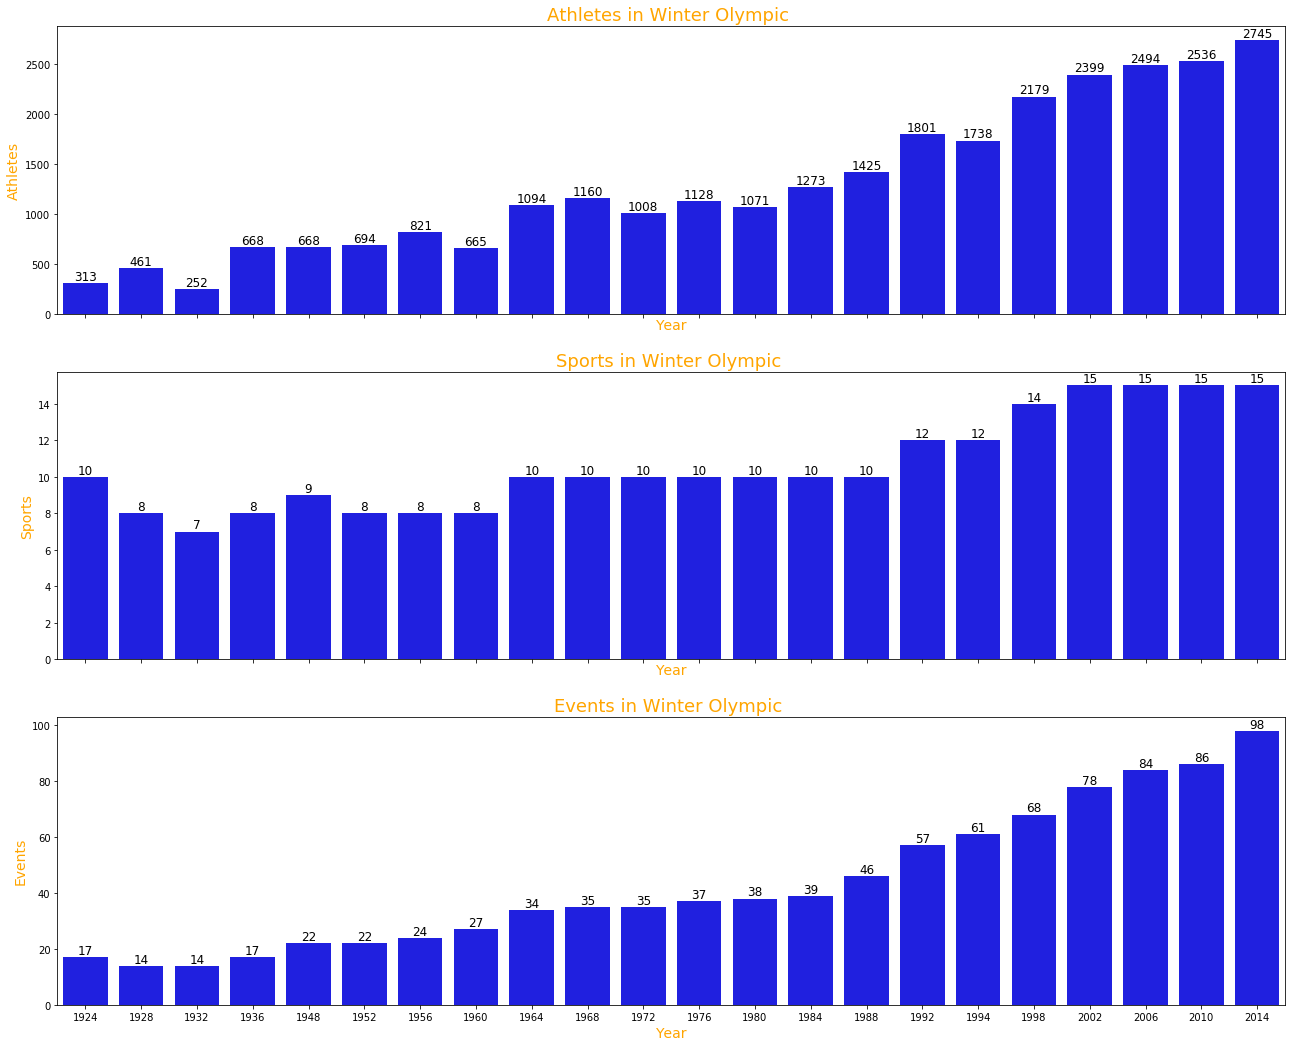

In [9]:



winterData = olympics2[olympics2['Season']=='Winter']

winterAthletes = winterData.pivot_table(winterData, index=['Year'], aggfunc=lambda x: len(x.unique())).reset_index()[['Year','ID']]
winterSports = winterData.groupby('Year')['Sport'].nunique().reset_index()
winterEvents = winterData.groupby('Year')['Event'].nunique().reset_index()

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(22,18))

sns.barplot(x='Year', y='ID', data=winterAthletes, ax=ax[0], color="blue")
sns.barplot(x='Year', y='Sport', data=winterSports, ax=ax[1], color="blue")
sns.barplot(x='Year', y='Event', data=winterEvents, ax=ax[2], color="blue")

j = 0
for i in ['Athletes', 'Sports', 'Events']:
    ax[j].set_xlabel('Year', size=14, color="orange")
    ax[j].set_ylabel(i, size=14, color="orange")
    ax[j].set_title(i + ' in Winter Olympic ', size=18, color="orange")
    j = j + 1
    
for i in range(3):
    for p in ax[i].patches:
        ax[i].text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Hello Folks!")
olympic_athletes = pd.read_csv("athlete_events.csv") # Olympics Dataset

olympic_athletes.head()


Hello Folks!


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
olympic_athletes['BMI'] = olympic_athletes['Weight']/(olympic_athletes['Height']/100)**2
olympic_athletes['BMI']

0         24.691358
1         20.761246
2               NaN
3               NaN
4         23.959094
5         23.959094
6         23.959094
7         23.959094
8         23.959094
9         23.959094
10        21.220009
11        21.220009
12        21.220009
13        21.220009
14        21.220009
15        21.220009
16        21.220009
17        21.220009
18        21.499597
19        21.499597
20        21.499597
21        21.499597
22        21.499597
23        21.499597
24        21.499597
25        21.499597
26              NaN
27              NaN
28        27.748873
29              NaN
30        23.095037
31        23.661439
32        21.953246
33        21.953246
34        22.229062
35              NaN
36              NaN
37              NaN
38              NaN
39              NaN
40        25.106333
41        20.897959
42        20.897959
43        20.897959
44        20.897959
45        20.897959
46        20.897959
47        20.897959
48        20.897959
49        20.897959


In [12]:
olympic_athletes['BMI']

0         24.691358
1         20.761246
2               NaN
3               NaN
4         23.959094
5         23.959094
6         23.959094
7         23.959094
8         23.959094
9         23.959094
10        21.220009
11        21.220009
12        21.220009
13        21.220009
14        21.220009
15        21.220009
16        21.220009
17        21.220009
18        21.499597
19        21.499597
20        21.499597
21        21.499597
22        21.499597
23        21.499597
24        21.499597
25        21.499597
26              NaN
27              NaN
28        27.748873
29              NaN
30        23.095037
31        23.661439
32        21.953246
33        21.953246
34        22.229062
35              NaN
36              NaN
37              NaN
38              NaN
39              NaN
40        25.106333
41        20.897959
42        20.897959
43        20.897959
44        20.897959
45        20.897959
46        20.897959
47        20.897959
48        20.897959
49        20.897959


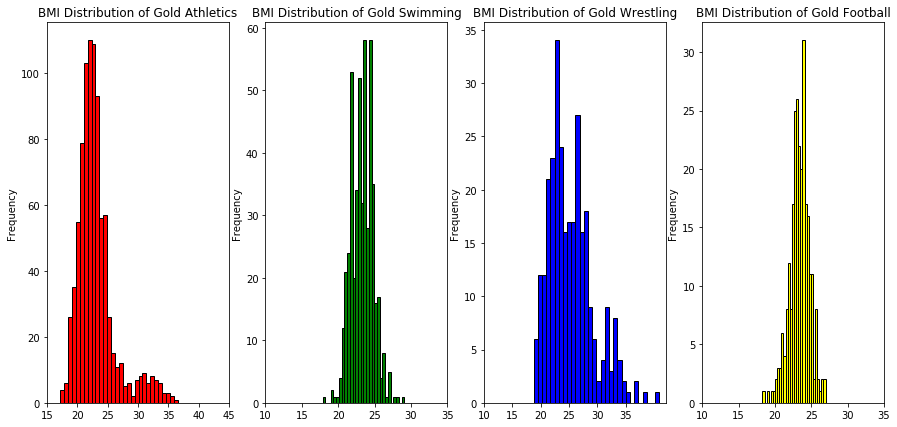

In [13]:

Athletics_male=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='M') & (olympic_athletes["Sport"]=='Athletics')]   
Swimmers_male=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='M') & (olympic_athletes["Sport"]=='Swimming')] 
Wrestlers_male=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='M') & (olympic_athletes["Sport"]=='Wrestling')]    
Footballers_male=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='M') & (olympic_athletes["Sport"]=='Football')]

f,ax=plt.subplots(1,4,figsize=(15,7))

Athletics_male.BMI.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='red')

ax[0].set_title('BMI Distribution of Gold Athletics')

x1=list(range(15,50,5))

ax[0].set_xticks(x1)

Swimmers_male.BMI.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='green')

ax[1].set_title('BMI Distribution of Gold Swimming')

x2=list(range(10,40,5))

ax[1].set_xticks(x2)




Wrestlers_male.BMI.plot.hist(ax=ax[2],bins=30,edgecolor='black',color='blue')

ax[2].set_title('BMI Distribution of Gold Wrestling')

x3=list(range(10,40,5))

ax[2].set_xticks(x3)


Footballers_male.BMI.plot.hist(ax=ax[3],bins=30,edgecolor='black',color='yellow')

ax[3].set_title('BMI Distribution of Gold Football')

x4=list(range(10,40,5))

ax[3].set_xticks(x4)


plt.show()




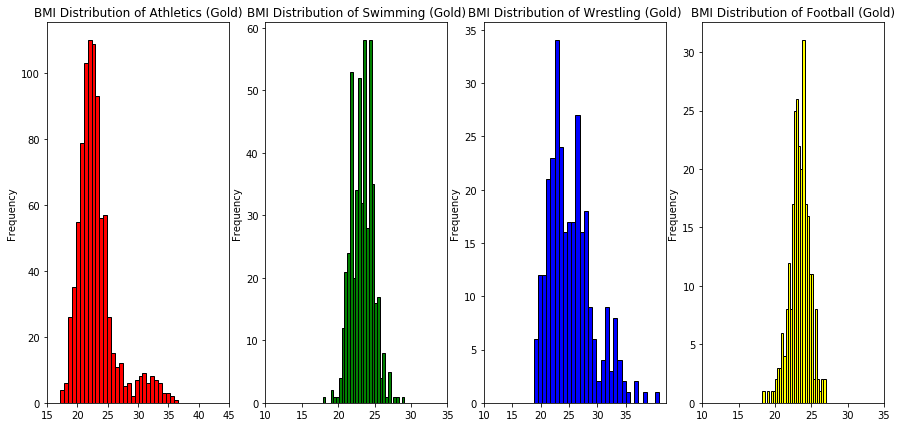

In [14]:

Athletics=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='M') & (olympic_athletes["Sport"]=='Athletics')].loc[:,["BMI","Sport","Medal"]]    
Swimmers=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='M') & (olympic_athletes["Sport"]=='Swimming')].loc[:,["BMI","Sport","Medal"]]    
Wrestlers=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='M')  & (olympic_athletes["Sport"]=='Wrestling')].loc[:,["BMI","Sport","Medal"]]    
Footballers=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='M') & (olympic_athletes["Sport"]=='Football')].loc[:,["BMI","Sport","Medal"]]    

f,ax=plt.subplots(1,4,figsize=(15,7))

Athletics.BMI.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='red')
plt.title("Male")

ax[0].set_title('BMI Distribution of Athletics (Gold)')

x1=list(range(15,50,5))

ax[0].set_xticks(x1)

Swimmers.BMI.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='green')

ax[1].set_title('BMI Distribution of Swimming (Gold)')

x2=list(range(10,40,5))

ax[1].set_xticks(x2)




Wrestlers.BMI.plot.hist(ax=ax[2],bins=30,edgecolor='black',color='blue')

ax[2].set_title('BMI Distribution of Wrestling (Gold)')

x3=list(range(10,40,5))

ax[2].set_xticks(x3)


Footballers.BMI.plot.hist(ax=ax[3],bins=30,edgecolor='black',color='yellow')

ax[3].set_title('BMI Distribution of Football (Gold)')

x4=list(range(10,40,5))

ax[3].set_xticks(x4)


plt.show()




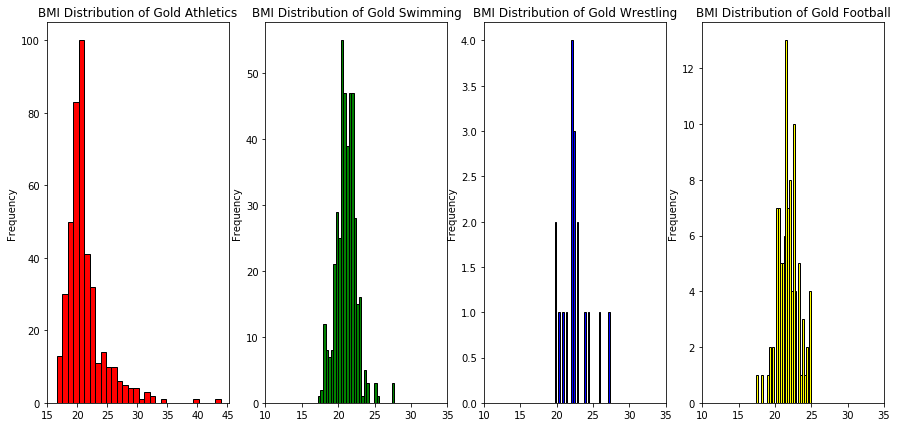

In [15]:

Athletics=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='F') & (olympic_athletes["Sport"]=='Athletics')].loc[:,["BMI","Sport","Medal"]]    
Swimmers=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='F') & (olympic_athletes["Sport"]=='Swimming')].loc[:,["BMI","Sport","Medal"]]    
Wrestlers=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='F')  & (olympic_athletes["Sport"]=='Wrestling')].loc[:,["BMI","Sport","Medal"]]    
Footballers=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Sex"]=='F') & (olympic_athletes["Sport"]=='Football')].loc[:,["BMI","Sport","Medal"]]    

f,ax=plt.subplots(1,4,figsize=(15,7))

Athletics.BMI.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='red')

ax[0].set_title('BMI Distribution of Gold Athletics')

x1=list(range(15,50,5))

ax[0].set_xticks(x1)

Swimmers.BMI.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='green')

ax[1].set_title('BMI Distribution of Gold Swimming')

x2=list(range(10,40,5))

ax[1].set_xticks(x2)




Wrestlers.BMI.plot.hist(ax=ax[2],bins=30,edgecolor='black',color='blue')

ax[2].set_title('BMI Distribution of Gold Wrestling')

x3=list(range(10,40,5))

ax[2].set_xticks(x3)


Footballers.BMI.plot.hist(ax=ax[3],bins=30,edgecolor='black',color='yellow')

ax[3].set_title('BMI Distribution of Gold Football')

x4=list(range(10,40,5))

ax[3].set_xticks(x4)


plt.show()




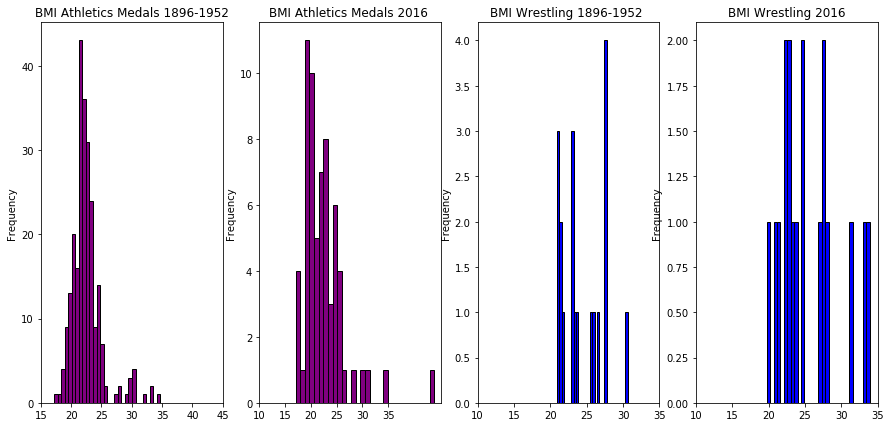

In [16]:
# Evolution Based on BMI


years = [1896,1900,1904,1908,1912,1916,1920,1924,1928]

Athletics_1896=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Year"].isin(years)) & (olympic_athletes["Sport"]=='Athletics')]

#Athletics_2016= olympic_athletes[(olympic_athletes["Year"]=='2016') & (olympic_athletes["Sport"]=='Athletics')].loc[:,["BMI","Sport","Medal"]]    
Athletics_2016=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Year"]==2016) & (olympic_athletes["Sport"]=='Athletics')]


Wrestlers_1896=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Year"].isin(years)) & (olympic_athletes["Sport"]=='Wrestling')]    
Wrestlers_2016=olympic_athletes[(olympic_athletes["Medal"]=='Gold') & (olympic_athletes["Year"]==2016) & (olympic_athletes["Sport"]=='Wrestling')]

f,ax=plt.subplots(1,4,figsize=(15,7))

Athletics_1896.BMI.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='purple')

ax[0].set_title('BMI Athletics Medals 1896-1952')

x1=list(range(15,50,5))

ax[0].set_xticks(x1)

Athletics_2016.BMI.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='purple')

ax[1].set_title('BMI Athletics Medals 2016 ')

x2=list(range(10,40,5))

ax[1].set_xticks(x2)


Wrestlers_1896.BMI.plot.hist(ax=ax[2],bins=30,edgecolor='black',color='blue')

ax[2].set_title('BMI Wrestling 1896-1952 ')

x3=list(range(10,40,5))

ax[2].set_xticks(x3)


Wrestlers_2016.BMI.plot.hist(ax=ax[3],bins=30,edgecolor='black',color='blue')

ax[3].set_title('BMI Wrestling 2016')

x4=list(range(10,40,5))

ax[3].set_xticks(x4)


plt.show()




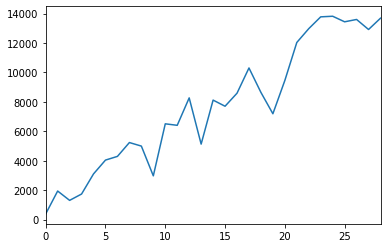

In [17]:

summer_olympic_athletes = olympic_athletes[(olympic_athletes.Season == 'Summer')]
summer_olympic_athletes.groupby(['Year'])['ID'].count().reset_index(drop=True).plot(kind='line')



In [18]:
sprinters = summer_olympic_athletes[summer_olympic_athletes['Event']=="Athletics Men's 100 metres"]
sprinters.groupby(['Year'])['Height'].mean()

sprinters_gold = summer_olympic_athletes[(summer_olympic_athletes['Medal']=='Gold') & (summer_olympic_athletes['Event']=="Athletics Men's 100 metres")]
sprinters_gold
sprinters.groupby(['Year'])['Height'].mean()

#sprinters_medal = summer_olympic_athletes[(summer_olympic_athletes['Medal'].isin('Gold','Silver','Bronze')
                                      #     & (summer_olympic_athletes['Event']=="Athletics Men's 100 metres")]
med=['Gold','Silver','Bronze']
sprinters_medal = summer_olympic_athletes[(summer_olympic_athletes['Medal'].isin(med)) & (summer_olympic_athletes['Event']=="Athletics Men's 100 metres")]
    
sprinters_medal
sprinters_medal.groupby(['Year'])['Height'].mean()


#Athletics Men's 100 metres

Year
1896    173.333333
1900    176.000000
1904    174.500000
1906    171.000000
1908    174.000000
1912    177.666667
1920    175.000000
1924    175.333333
1928    177.000000
1932    176.333333
1936    178.000000
1948    181.000000
1952    179.333333
1956    179.666667
1960    183.666667
1964    176.666667
1968    179.666667
1972    183.000000
1976    181.666667
1980    178.666667
1984    181.000000
1988    185.000000
1992    181.333333
1996    179.666667
2000    178.000000
2004    185.666667
2008    186.333333
2012    187.333333
2016    186.000000
Name: Height, dtype: float64

In [19]:
sprinters_medal = summer_olympic_athletes[(summer_olympic_athletes['Medal'].isin(med)) & (summer_olympic_athletes['Event']=="Athletics Men's 100 metres")]
    
sprinters_medal
sprinters_medal.groupby(['Year'])['Height'].mean()

Year
1896    173.333333
1900    176.000000
1904    174.500000
1906    171.000000
1908    174.000000
1912    177.666667
1920    175.000000
1924    175.333333
1928    177.000000
1932    176.333333
1936    178.000000
1948    181.000000
1952    179.333333
1956    179.666667
1960    183.666667
1964    176.666667
1968    179.666667
1972    183.000000
1976    181.666667
1980    178.666667
1984    181.000000
1988    185.000000
1992    181.333333
1996    179.666667
2000    178.000000
2004    185.666667
2008    186.333333
2012    187.333333
2016    186.000000
Name: Height, dtype: float64

In [20]:
sprinters_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
915,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold,22.395413
12653,6890,Donovan Bailey,M,28.0,183.0,82.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Gold,24.485652
12684,6901,Emmanuel McDonald Bailey,M,31.0,180.0,65.0,Great Britain,GBR,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 100 metres,Bronze,20.061728
12940,7038,Walter Thane Baker,M,25.0,183.0,72.0,United States,USA,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Men's 100 metres,Silver,21.499597
14645,7894,Nigel Chase Barker,M,23.0,NaN,NaN,Australia,AUS,1906 Summer,1906,Summer,Athina,Athletics,Athletics Men's 100 metres,Bronze,NaN
22991,12086,Yohan Blake,M,22.0,180.0,80.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Silver,24.691358
24711,12946,Ato Jabari Boldon,M,22.0,176.0,75.0,Trinidad and Tobago,TTO,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Bronze,24.212293
24713,12946,Ato Jabari Boldon,M,26.0,176.0,75.0,Trinidad and Tobago,TTO,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's 100 metres,Silver,24.212293
24877,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Gold,24.729279
24880,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Gold,24.729279


In [21]:
sprinters_gold.groupby(['Year'])['Height'].mean()

Year
1896    183.0
1900    167.0
1904    167.0
1906    167.0
1908    170.0
1912    182.0
1920    172.0
1924    183.0
1928    170.0
1932    170.0
1936    178.0
1948    178.0
1952    173.0
1956    186.0
1960    182.0
1964    183.0
1968    183.0
1972    183.0
1976    187.0
1980    183.0
1984    188.0
1988    188.0
1992    189.0
1996    183.0
2000    176.0
2004    186.0
2008    196.0
2012    196.0
2016    196.0
Name: Height, dtype: float64

In [22]:
sprinters = summer_olympic_athletes[summer_olympic_athletes['Event']=="Athletics Men's 100 metres"]
sprinters.groupby(['Year'])['Weight'].mean()

sprinters_gold = summer_olympic_athletes[(summer_olympic_athletes['Medal']=='Gold') & (summer_olympic_athletes['Event']=="Athletics Men's 100 metres")]
sprinters_gold
sprinters.groupby(['Year'])['Weight'].mean()

#sprinters_medal = summer_olympic_athletes[(summer_olympic_athletes['Medal'].isin('Gold','Silver','Bronze')
                                      #     & (summer_olympic_athletes['Event']=="Athletics Men's 100 metres")]
med=['Gold','Silver','Bronze']
sprinters_medal = summer_olympic_athletes[(summer_olympic_athletes['Medal'].isin(med)) & (summer_olympic_athletes['Event']=="Athletics Men's 100 metres")]
    
sprinters_medal
sprinters_medal.groupby(['Year'])['Weight'].mean()


#Athletics Men's 100 metres

Year
1896    63.666667
1900    64.333333
1904    67.500000
1906    67.000000
1908    66.333333
1912    70.000000
1920    76.000000
1924    66.666667
1928    71.666667
1932    73.333333
1936    77.666667
1948    71.000000
1952    68.000000
1956    70.666667
1960    71.000000
1964    76.666667
1968    76.333333
1972    79.666667
1976    80.000000
1980    76.666667
1984    75.000000
1988    81.000000
1992    79.000000
1996    76.666667
2000    77.666667
2004    79.666667
2008    85.000000
2012    85.000000
2016    81.666667
Name: Weight, dtype: float64

In [23]:
sprinters.groupby(['Year'])['Weight'].mean()

Year
1896    70.857143
1900    67.571429
1904    68.833333
1906    70.090909
1908    69.368421
1912    69.200000
1920    71.076923
1924    67.195652
1928    67.360000
1932    70.117647
1936    72.571429
1948    69.457143
1952    68.933333
1956    69.733333
1960    70.186441
1964    70.273973
1968    70.630769
1972    69.666667
1976    71.354839
1980    69.864407
1984    70.607595
1988    72.292929
1992    74.052632
1996    74.260000
2000    73.771739
2004    74.475610
2008    77.000000
2012    74.084507
2016    74.423077
Name: Weight, dtype: float64

In [24]:
sprinters_gold.groupby(['Year'])['Weight'].mean()


Year
1896    66.0
1900    58.0
1904    64.0
1906    64.0
1908    61.0
1912    73.0
1920    75.0
1924    75.0
1928    56.0
1932    65.0
1936    71.0
1948    69.0
1952    67.0
1956    75.0
1960    71.0
1964    86.0
1968    81.0
1972    80.0
1976    90.0
1980    86.0
1984    80.0
1988    80.0
1992    94.0
1996    82.0
2000    80.0
2004    80.0
2008    95.0
2012    95.0
2016    95.0
Name: Weight, dtype: float64

In [25]:
sprinters_medal.groupby(['Year'])['Weight'].mean()

Year
1896    63.666667
1900    64.333333
1904    67.500000
1906    67.000000
1908    66.333333
1912    70.000000
1920    76.000000
1924    66.666667
1928    71.666667
1932    73.333333
1936    77.666667
1948    71.000000
1952    68.000000
1956    70.666667
1960    71.000000
1964    76.666667
1968    76.333333
1972    79.666667
1976    80.000000
1980    76.666667
1984    75.000000
1988    81.000000
1992    79.000000
1996    76.666667
2000    77.666667
2004    79.666667
2008    85.000000
2012    85.000000
2016    81.666667
Name: Weight, dtype: float64

In [1]:
#
#sd#